<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignment 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.datasets import boston_housing
from sklearn.preprocessing import MinMaxScaler

In [17]:
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

Scaler  = MinMaxScaler()

x_train = Scaler.fit_transform(x_train)
x_test  = Scaler.fit_transform(x_test)

model = Sequential(name='Model')
model.add(Dense(13, input_shape=(13,), activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
model.summary()

Model: "Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 13)                182       
_________________________________________________________________
dense_7 (Dense)              (None, 7)                 98        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 8         
Total params: 288
Trainable params: 288
Non-trainable params: 0
_________________________________________________________________


In [18]:
scores = model.evaluate(x_test, y_test)
print(f'{model.metrics_names[1]}: {scores[1]}')

102/102 [==============================] - 0s 777us/sample - loss: 615.8967 - mean_squared_error: 615.8966
mean_squared_error: 615.8966064453125


In [19]:
model_run = model.fit(x_train, y_train, epochs=250, validation_split=.1, verbose=False)

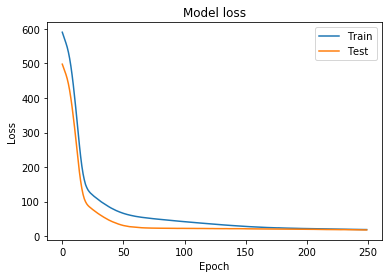

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(model_run.history['loss'])
plt.plot(model_run.history['val_loss'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')

plt.show()

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

lin_reg = LinearRegression()

lin_reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
scores = model.evaluate(x_train, y_train)
print(f'{model.metrics_names[1]}: {scores[1]}')

404/404 [==============================] - 0s 32us/sample - loss: 18.8121 - mean_squared_error: 18.8121
mean_squared_error: 18.812135696411133


## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- The number of nodes in your output layer should equal the number of classes you want to predict for Fashion-MNIST.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [84]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

In [85]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [86]:
mnist = Sequential(name="mnistmodel")

mnist.add(Dense(784, input_shape=(784,), activation='relu'))
mnist.add(Dense(387, activation='relu'))
mnist.add(Dense(10, activation='softmax'))
mnist.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
mnist.summary()

Model: "mnistmodel"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 784)               615440    
_________________________________________________________________
dense_46 (Dense)             (None, 387)               303795    
_________________________________________________________________
dense_47 (Dense)             (None, 10)                3880      
Total params: 923,115
Trainable params: 923,115
Non-trainable params: 0
_________________________________________________________________


In [90]:
scores = mnist.evaluate(x_test, y_test)
print(f"{mnist.metrics_names[1]}: {scores[1]}")

10000/10000 [==============================] - 1s 116us/sample - loss: 0.5691 - accuracy: 0.8801
accuracy: 0.8801000118255615


In [88]:
mnist_run = mnist.fit(x_train, y_train, epochs=100, batch_size=500, validation_split=.1, verbose=False)

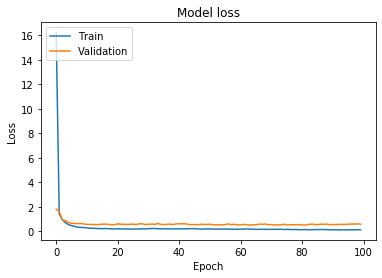

In [89]:
plt.plot(mnist_run.history['loss'])
plt.plot(mnist_run.history['val_loss'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.